Uvozimo modul

In [10]:
import foos

Preberemo podatke iz datoteke in jih shranimo v csv

In [37]:
foos.download_files()
foos.reparse_files()

In [11]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option('display.min_rows', 20)

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
# tu raje delam z razpredelnico, ki sem jo na roke dopolnila
FOOS = pd.read_csv('foos/foos_dop.csv', index_col='leto')

In [12]:
FOOS

,ime,drzava,rang,miza
leto,,,,
2004,WCS Roberto Sport 2004,Italy,WS,Roberto Sport
2004,WCS Bonzini 2004,France,WS,Bonzini
2004,WCS Eurosoccer 2004,Belgium,WS,Euro Soccer
2004,WCS Tornado 2004,United States,WS,Tornado
2004,World Championships 2005,Italy,World Cup,Multitable
2005,Germany Open,Germany,Masters,Bonzini
2005,Hungarian Master Series,Hungary,Masters,Garlando
2005,Canadian Master series,Canada,Masters,Multitable
2005,WCS Bonzini 2005,France,WS,Bonzini


Prikaz, koliko turnirjev se je zgodilo vsako leto. Od začetka bolj malo, z leti optem število večinoma narašča. V letih od 2019 do 2021 lahko opazimo padec števla turnirjev zaradi pandemije. Od takrat pa število ponovno narašča in se vrača v prejšnje stanje.

<Axes: xlabel='leto'>

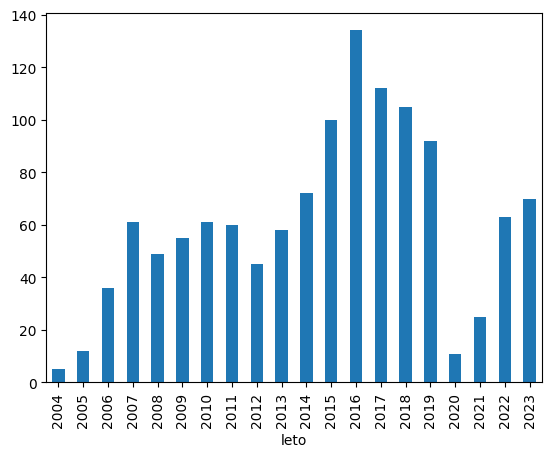

In [14]:
letno = FOOS.groupby('leto').size()
letno
letno.plot.bar()

Prikaz števila turnirjev na posamezni mizi. Največ turnirjev se izvaja na petih uradnih turnirskih mizah (Garlando, Leonhart, Tornado, Bonzini in Roberto Sport) ter multitsable turnirji, ki se izvajajo na vseh teh hkrati.

<Axes: xlabel='miza'>

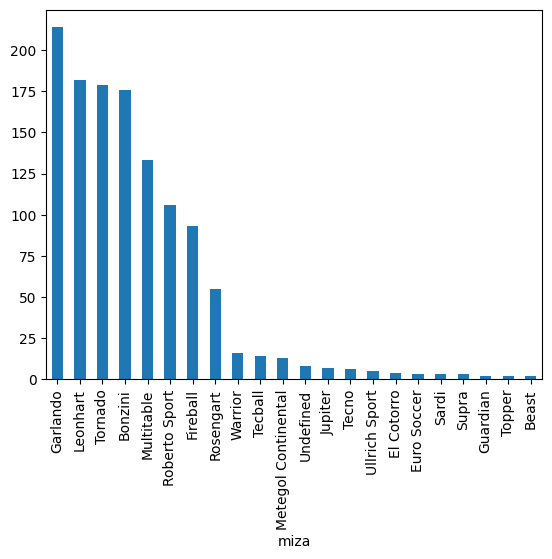

In [15]:
po_mizah = FOOS.groupby('miza').size().sort_values(ascending=False)
po_mizah
po_mizah.plot.bar()

Prikaz števila turnirjev po rangu, v vrstnem redu. ECL je poseben, saj gre za ekipno tekmovanje enkrat letno in se od tega turnirja ne štejejo točke tekmovalcem. Rang v tem primeru pomeni, koliko točk prinese posamezna uvrstitev. Izjema je World Cup, kjer se točke prav tako, kot pri ECL, ne štejejo, vendar gre za največji turnir in uvrstitev.

In [16]:
custom_dict = {'World Cup': 0, 'WS': 1, 'International': 2, 'Masters': 3, 'Pro Tour': 4, 'ECL': 5} 
rangirano = FOOS.groupby('rang').size()
FOOS['rang'] = pd.Categorical(FOOS['rang'], ["World Cup", "WS", "International", "Masters", "Pro Tour", "ECL"])
FOOS.sort_values('rang')
rangirano = FOOS.groupby('rang').size()
rangirano

rang
World Cup         23
WS                71
International     65
Masters          413
Pro Tour         641
ECL               13
dtype: int64

Število turnirjev po državah. Največkrat se turnirji dogajajo v ZDA in po evropskih državah.

In [17]:
po_drzavah= FOOS.groupby('drzava').size().sort_values(ascending=False)
po_drzavah

drzava
United States           150
Germany                 102
France                  101
Austria                  77
Czech Republic           67
Bulgaria                 59
United Kingdom           44
Switzerland              37
Slovakia                 37
Canada                   35
Poland                   30
ROC                      28
China                    26
Netherlands              23
Spain                    23
Italy                    21
Romania                  20
Portugal                 20
Japan                    19
Argentina                19
Denmark                  19
United Arab Emirates     18
Australia                17
Belgium                  17
Chinese Taipei           16
Hungary                  16
Peru                     16
India                    15
Lithuania                13
Malaysia                 12
Slovenia                 12
Latvia                   12
Turkey                   11
Luxembourg               11
Brazil                   10
Mexico       

(-1.25, 1.25, -1.25, 1.25)

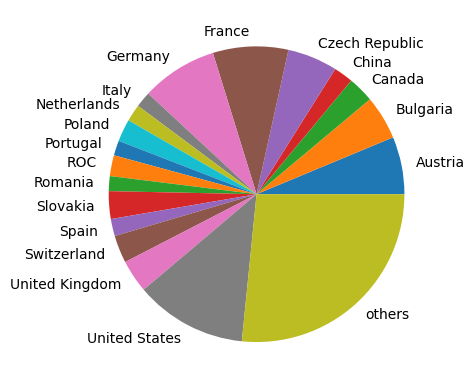

In [31]:

res = {po_drzavah.keys()[i]: po_drzavah.values[i] for i in range(len(po_drzavah.values))}
dicti = foos.drzave_to_others(res)
dicti = pd.DataFrame(dicti.items(), columns=['drzava', 'st tekem'])
a = dicti.groupby(['drzava']).sum().plot(kind='pie', y='st tekem')
a.get_legend().remove()
a.axis('off')

